Code erstellt nach Tutorial, identsiche Codezeilen nach:
Parashar, A. (2020, 13. Oktober). Sentiment Analysis web app using NLTK and Heroku. medium. https://medium.com/pythoneers/sentiment-analysis-web-app-using-nltk-and-heroku-96ccd37c44ef

In [1]:
import numpy as np
import pickle
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

# Naive Bayes 

Hier werden Naive Bayes classifier erstellt und mit Daten trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.


In [2]:
#GNB = GaussianNB()
#MNB = MultinomialNB()
BNB = BernoulliNB()

#clsGNB = GNB.fit(X_train, y_train)
#clsMNB = MNB.fit(X_train, y_train)
clsBNB = BNB.fit(X_train, y_train)

#print(clsGNB.score(X_test, y_test))
#print(clsMNB.score(X_test, y_test))
print(clsBNB.score(X_test, y_test))

0.8395


## Prediction - mit Naive Bayes als Trainingsmodell


In [3]:
y_pred = clsBNB.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


## Modell bewerten - mittels Confusion Matrix und Accuracy Score

[[4189  846]
 [ 759 4206]] 83.95


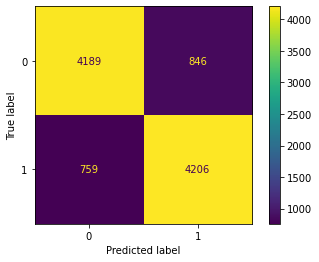

In [4]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Speichern des Modells - das trainierte Modell wird als Datei gespeichert

In [5]:
# Save trained model to file
pickle.dump(clsBNB, open("nb_review.pkl", "wb"))

## Erneutes Laden des Modells in einer Variable

In [6]:
loaded_model = pickle.load(open("nb_review.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

del X_train
del X_test
del y_train
del y_test